In [2]:
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
from datetime import datetime 
from download import download
from __future__ import absolute_import,division,print_function,unicode_literals

mpl.rcParams['figure.figsize'] =(8,6)
mpl.rcParams['axes.grid'] = False

In [3]:
def convert_to_date(x):
    return datetime.strptime(x,'%Y %m %d %H')


file_path = '../datasets/beijing+multi+site+air+quality+data/PRSA_Data_Dingling_20130301-20170228.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', parse_dates=[['year' ,'month','day','hour']], date_format=convert_to_date ,keep_date_col=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_52620\487515556.py:6: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', parse_dates=[['year' ,'month','day','hour']], date_format=convert_to_date ,keep_date_col=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_52620\487515556.py:6: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', parse_dates=[['year' ,'month','day','hour']], date_format=convert_to_date ,keep_date_col=True)


In [3]:
df

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,2017-02-28 22:00:00,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [4]:
df = df.drop(columns=['year','month','day','hour'],axis=1)

In [7]:
df

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,35060,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,2017-02-28 20:00:00,35061,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,2017-02-28 21:00:00,35062,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,2017-02-28 22:00:00,35063,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   PM2.5                34285 non-null  float64       
 3   PM10                 34408 non-null  float64       
 4   SO2                  34334 non-null  float64       
 5   NO2                  33830 non-null  float64       
 6   CO                   33052 non-null  float64       
 7   O3                   33850 non-null  float64       
 8   TEMP                 35011 non-null  float64       
 9   PRES                 35014 non-null  float64       
 10  DEWP                 35011 non-null  float64       
 11  RAIN                 35013 non-null  float64       
 12  wd                   34924 non-null  object        
 13  WSPM                 35021 non-

In [6]:
df.isnull().sum()

year_month_day_hour       0
No                        0
PM2.5                   779
PM10                    656
SO2                     730
NO2                    1234
CO                     2012
O3                     1214
TEMP                     53
PRES                     50
DEWP                     53
RAIN                     51
wd                      140
WSPM                     43
station                   0
dtype: int64

In [7]:
df.query('TEMP != TEMP') #NAN is object not value

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,2015-01-27 20:00:00,16749,39.0,43.0,28.0,34.0,1100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16813,2015-01-30 13:00:00,16814,15.0,19.0,19.0,5.0,400.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16829,2015-01-31 05:00:00,16830,5.0,11.0,32.0,8.0,400.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16873,2015-02-02 01:00:00,16874,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16883,2015-02-02 11:00:00,16884,138.0,138.0,52.0,73.0,2200.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16930,2015-02-04 10:00:00,16931,8.0,8.0,13.0,5.0,200.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16933,2015-02-04 13:00:00,16934,13.0,16.0,14.0,3.0,300.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17007,2015-02-07 15:00:00,17008,3.0,24.0,2.0,2.0,200.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17030,2015-02-08 14:00:00,17031,4.0,5.0,7.0,2.0,200.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17052,2015-02-09 12:00:00,17053,87.0,87.0,82.0,53.0,1600.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling


In [8]:
df.query('TEMP != TEMP').count()

#here ,at most 53 has null items

year_month_day_hour    53
No                     53
PM2.5                  53
PM10                   53
SO2                    53
NO2                    53
CO                     53
O3                     53
TEMP                    0
PRES                    3
DEWP                    0
RAIN                    3
wd                     10
WSPM                   10
station                53
dtype: int64

In [9]:
df[df['PM2.5'].isnull()]
#checking null values on PM2.5

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
752,2013-04-01 08:00:00,753,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1005.9,-3.2,0.0,NW,7.2,Dingling
753,2013-04-01 09:00:00,754,NaN,NaN,NaN,NaN,NaN,NaN,10.6,1007.0,-3.5,0.0,NNW,4.5,Dingling
754,2013-04-01 10:00:00,755,NaN,NaN,NaN,NaN,NaN,NaN,13.2,1007.8,-3.6,0.0,NNW,4.5,Dingling
755,2013-04-01 11:00:00,756,NaN,NaN,NaN,NaN,NaN,NaN,13.8,1007.7,-4.9,0.0,NNE,4.0,Dingling
756,2013-04-01 12:00:00,757,NaN,NaN,NaN,NaN,NaN,NaN,15.3,1007.9,-5.7,0.0,NE,5.0,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34863,2017-02-20 15:00:00,34864,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1022.0,-21.0,0.0,WNW,3.1,Dingling
34864,2017-02-20 16:00:00,34865,NaN,NaN,NaN,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling
34866,2017-02-20 18:00:00,34867,NaN,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling
34883,2017-02-21 11:00:00,34884,NaN,NaN,26.0,68.0,NaN,5.0,-0.5,1022.7,-16.0,0.0,ESE,1.9,Dingling


In [10]:
import plotly.express as px

fig = px.line(df,x='year_month_day_hour', y='PM2.5', title='PM2.5 with slider')
fig.update_xaxes(rangeslider_visible = True,
                 rangeselector = dict(buttons=list([
                     dict(count=1, step='year',label='1y',stepmode='backward'),
                     dict(count=2,label='2y',step='year',stepmode='backward'),
                     dict(count=3,label='3y',step='year',stepmode='backward'),
                     dict(step='all')
                 ])))
fig.show()

In [11]:
fig2 = px.line(df,x='year_month_day_hour', y='TEMP', title='TEMP with slider')
fig2.update_xaxes(rangeslider_visible=True,
                  rangeselector =dict(buttons=list([
                      dict(count=1, step='year',label='1y',stepmode='backward'),
                     dict(count=2,label='2y',step='year',stepmode='backward'),
                     dict(count=3,label='3y',step='year',stepmode='backward'),
                     dict(step='all')
                  ])))
fig2.show()

In [12]:
df = df.set_index('year_month_day_hour')
df

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
2017-02-28 20:00:00,35061,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
2017-02-28 21:00:00,35062,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling


In [13]:
df_dropna = df.copy()
df_dropna = df_dropna.dropna()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

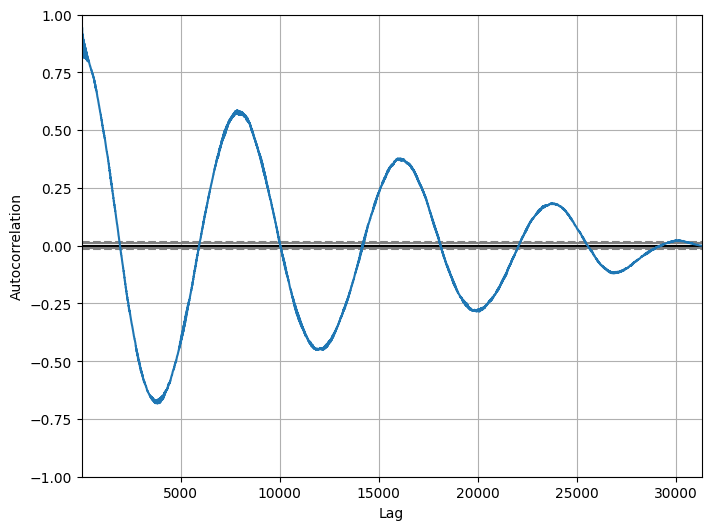

In [14]:
pd.plotting.autocorrelation_plot(df_dropna['TEMP'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

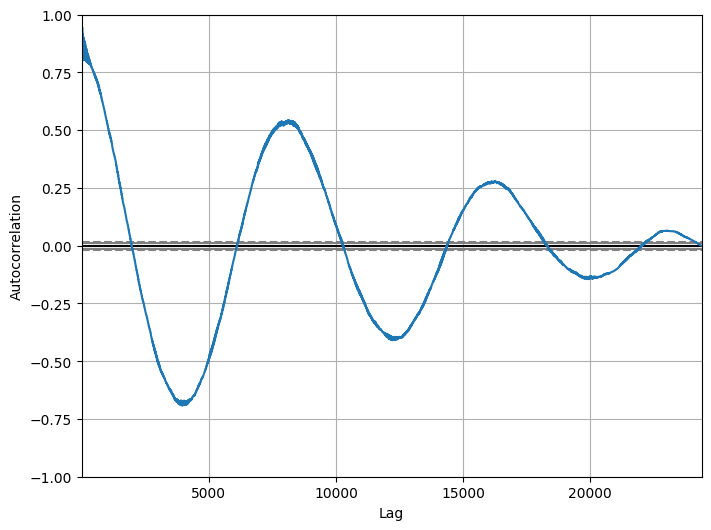

In [15]:
pd.plotting.autocorrelation_plot(df_dropna['2014':'2016']['TEMP'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

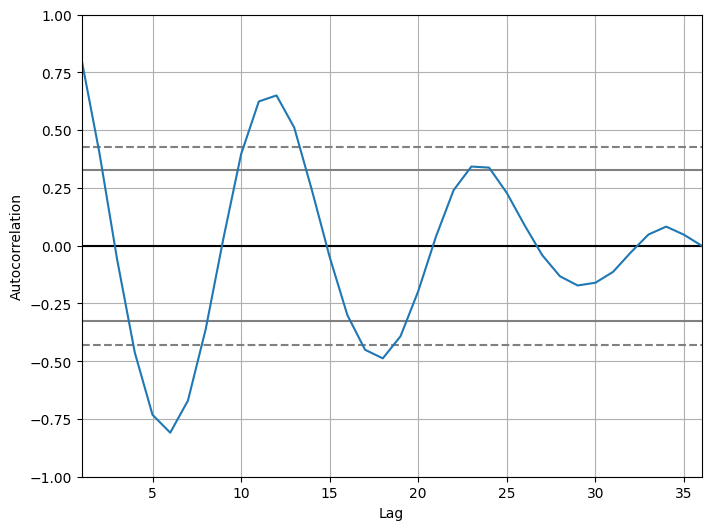

In [16]:
pd.plotting.autocorrelation_plot(df_dropna['2014':'2016']['TEMP'].resample('1ME').mean())

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

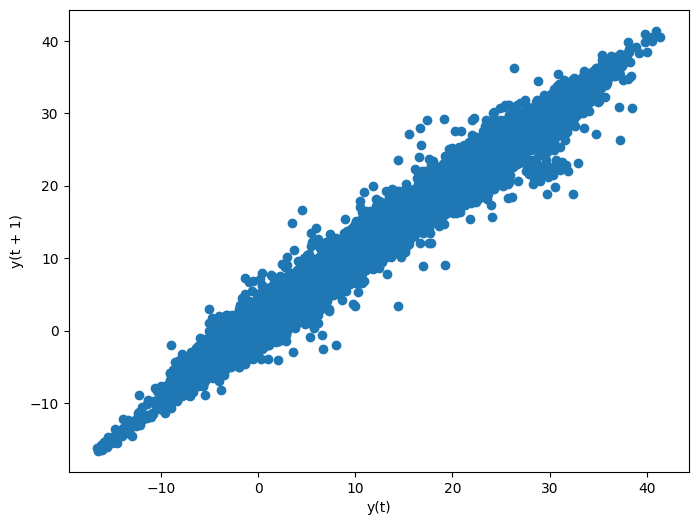

In [17]:
pd.plotting.lag_plot(df_dropna['TEMP'], lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

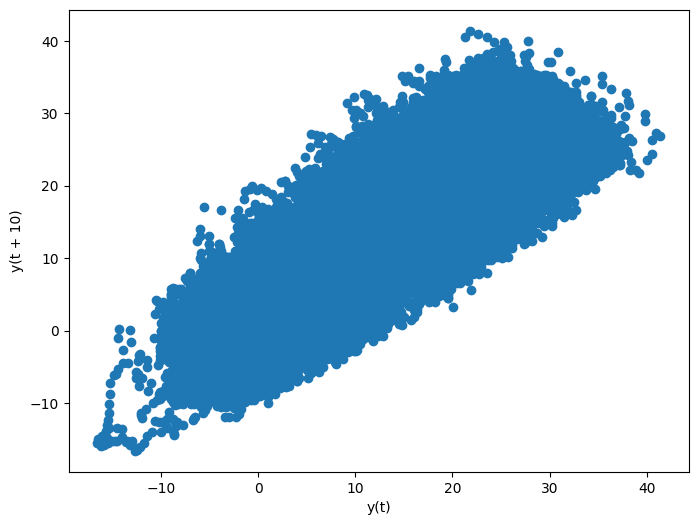

In [18]:
pd.plotting.lag_plot(df_dropna['TEMP'], lag=10)

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

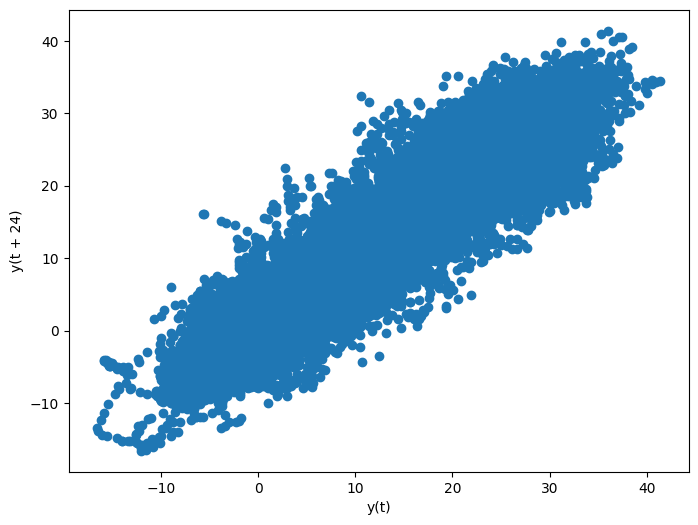

In [19]:
pd.plotting.lag_plot(df_dropna['TEMP'], lag=24)

<Axes: xlabel='y(t)', ylabel='y(t + 8640)'>

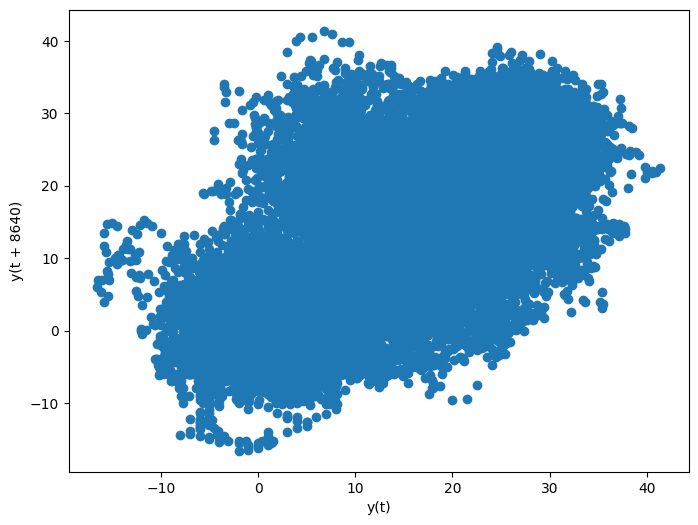

In [20]:
pd.plotting.lag_plot(df_dropna['TEMP'], lag=8640)

<Axes: xlabel='y(t)', ylabel='y(t + 4320)'>

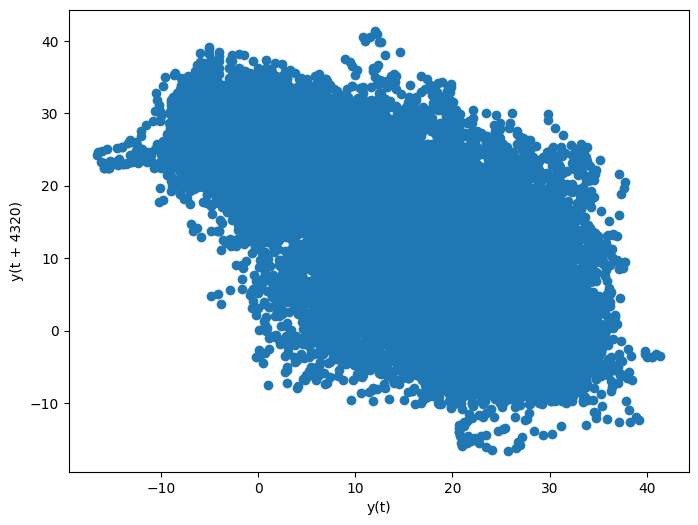

In [21]:
pd.plotting.lag_plot(df_dropna['TEMP'], lag=4320)

<Axes: xlabel='y(t)', ylabel='y(t + 3160)'>

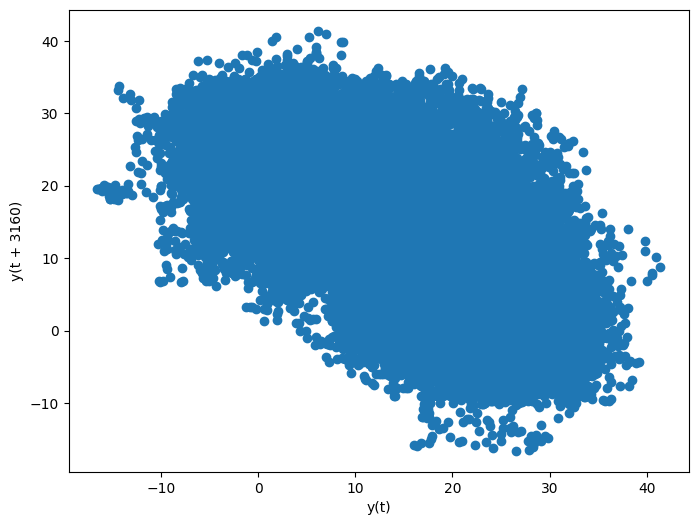

In [22]:
pd.plotting.lag_plot(df_dropna['TEMP'], lag=3160)

In [23]:
df

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
2017-02-28 20:00:00,35061,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
2017-02-28 21:00:00,35062,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling


In [28]:
#making a temp df for missing value imputation

temp_df = df['2015-02-21 10':'2015-02-21 23'][['TEMP']]
temp_df

,TEMP
year_month_day_hour,
2015-02-21 10:00:00,1.0
2015-02-21 11:00:00,1.0
2015-02-21 12:00:00,NaN
2015-02-21 13:00:00,2.0
2015-02-21 14:00:00,NaN
2015-02-21 15:00:00,4.0
2015-02-21 16:00:00,4.0
2015-02-21 17:00:00,3.0
2015-02-21 18:00:00,2.0


In [30]:
temp_df['FFILL'] = temp_df['TEMP'].ffill() #forward fill, takes value from previous steps
temp_df

,TEMP,FFILL
year_month_day_hour,,
2015-02-21 10:00:00,1.0,1.0
2015-02-21 11:00:00,1.0,1.0
2015-02-21 12:00:00,NaN,1.0
2015-02-21 13:00:00,2.0,2.0
2015-02-21 14:00:00,NaN,2.0
2015-02-21 15:00:00,4.0,4.0
2015-02-21 16:00:00,4.0,4.0
2015-02-21 17:00:00,3.0,3.0
2015-02-21 18:00:00,2.0,2.0


In [33]:
temp_df['BFILL'] = temp_df['TEMP'].bfill()  #not much applicable as future steps used as input to previous
temp_df

,TEMP,FFILL,BFILL
year_month_day_hour,,,
2015-02-21 10:00:00,1.0,1.0,1.0
2015-02-21 11:00:00,1.0,1.0,1.0
2015-02-21 12:00:00,NaN,1.0,2.0
2015-02-21 13:00:00,2.0,2.0,2.0
2015-02-21 14:00:00,NaN,2.0,4.0
2015-02-21 15:00:00,4.0,4.0,4.0
2015-02-21 16:00:00,4.0,4.0,4.0
2015-02-21 17:00:00,3.0,3.0,3.0
2015-02-21 18:00:00,2.0,2.0,2.0


In [35]:
temp_df['Rolling'] = temp_df['TEMP'].rolling(window=2,min_periods=1).mean()  #use 2 previous value, if NA, use 1.
#but it updates other than NAN values too.
temp_df

,TEMP,FFILL,BFILL,Rolling
year_month_day_hour,,,,
2015-02-21 10:00:00,1.0,1.0,1.0,1.0
2015-02-21 11:00:00,1.0,1.0,1.0,1.0
2015-02-21 12:00:00,NaN,1.0,2.0,1.0
2015-02-21 13:00:00,2.0,2.0,2.0,2.0
2015-02-21 14:00:00,NaN,2.0,4.0,2.0
2015-02-21 15:00:00,4.0,4.0,4.0,4.0
2015-02-21 16:00:00,4.0,4.0,4.0,4.0
2015-02-21 17:00:00,3.0,3.0,3.0,3.5
2015-02-21 18:00:00,2.0,2.0,2.0,2.5


In [43]:

temp_df['Rolling'] = temp_df['TEMP'].fillna(temp_df['TEMP'].rolling(window=2,min_periods=1).mean())
temp_df

,TEMP,FFILL,BFILL,Rolling,Rollingx
year_month_day_hour,,,,,
2015-02-21 10:00:00,1.0,1.0,1.0,1.0,1.0
2015-02-21 11:00:00,1.0,1.0,1.0,1.0,1.0
2015-02-21 12:00:00,NaN,1.0,2.0,1.0,1.0
2015-02-21 13:00:00,2.0,2.0,2.0,2.0,2.0
2015-02-21 14:00:00,NaN,2.0,4.0,2.0,2.0
2015-02-21 15:00:00,4.0,4.0,4.0,4.0,4.0
2015-02-21 16:00:00,4.0,4.0,4.0,4.0,4.0
2015-02-21 17:00:00,3.0,3.0,3.0,3.0,3.0
2015-02-21 18:00:00,2.0,2.0,2.0,2.0,2.0


In [44]:
temp_df = temp_df.reset_index()
temp_df

,year_month_day_hour,TEMP,FFILL,BFILL,Rolling,Rollingx
0,2015-02-21 10:00:00,1.0,1.0,1.0,1.0,1.0
1,2015-02-21 11:00:00,1.0,1.0,1.0,1.0,1.0
2,2015-02-21 12:00:00,NaN,1.0,2.0,1.0,1.0
3,2015-02-21 13:00:00,2.0,2.0,2.0,2.0,2.0
4,2015-02-21 14:00:00,NaN,2.0,4.0,2.0,2.0
5,2015-02-21 15:00:00,4.0,4.0,4.0,4.0,4.0
6,2015-02-21 16:00:00,4.0,4.0,4.0,4.0,4.0
7,2015-02-21 17:00:00,3.0,3.0,3.0,3.0,3.0
8,2015-02-21 18:00:00,2.0,2.0,2.0,2.0,2.0
9,2015-02-21 19:00:00,1.0,1.0,1.0,1.0,1.0


In [46]:
temp_df['PREV_YEAR'] = temp_df.apply(lambda x :df.loc[x['year_month_day_hour']-pd.offsets.DateOffset(years=-1)]['TEMP'] 
                                     if pd.isna(x['TEMP']) else x['TEMP'],axis=1)

temp_df

,year_month_day_hour,TEMP,FFILL,BFILL,Rolling,Rollingx,PREV_YEAR
0,2015-02-21 10:00:00,1.0,1.0,1.0,1.0,1.0,1.0
1,2015-02-21 11:00:00,1.0,1.0,1.0,1.0,1.0,1.0
2,2015-02-21 12:00:00,NaN,1.0,2.0,1.0,1.0,1.9
3,2015-02-21 13:00:00,2.0,2.0,2.0,2.0,2.0,2.0
4,2015-02-21 14:00:00,NaN,2.0,4.0,2.0,2.0,4.9
5,2015-02-21 15:00:00,4.0,4.0,4.0,4.0,4.0,4.0
6,2015-02-21 16:00:00,4.0,4.0,4.0,4.0,4.0,4.0
7,2015-02-21 17:00:00,3.0,3.0,3.0,3.0,3.0,3.0
8,2015-02-21 18:00:00,2.0,2.0,2.0,2.0,2.0,2.0
9,2015-02-21 19:00:00,1.0,1.0,1.0,1.0,1.0,1.0
